In [689]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import pickle
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
import copy
import math

In [185]:
file1 = open('subscribers','rb')
subs = pickle.load(file1)
subs

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [186]:
file2 = open('customer_service_reps','rb')
csr = pickle.load(file2)
csr

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


In [187]:
file3 = open('engagement','rb')
engagement = pickle.load(file3)
engagement

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
28832315,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832317,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832319,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0
28832321,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [189]:
##Get the csv of the data to put into tableau
subs.to_csv("subscribers.csv",index=False)
csr.to_csv("customer service rep.csv",index=False)
engagement.to_csv("engagement.csv",index=False)

In [ ]:
## Some EDA

In [191]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 162502 to 598241
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   retarget_TF                   227628 non-null  bool          
 8   age                           192459 non-null  float64       
 9   male_TF                       227359 non-null  object        
 10  country                       227628 non-null  object        
 11  attribut

In [192]:
csr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208643 entries, 4 to 2248413
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   customer_service_rep_id  int64         
 1   subid                    int64         
 2   current_sub_TF           bool          
 3   cancel_date              datetime64[ns]
 4   account_creation_date    datetime64[ns]
 5   num_trial_days           int64         
 6   trial_completed_TF       bool          
 7   billing_channel          object        
 8   revenue_net_1month       float64       
 9   payment_period           int64         
 10  last_payment             datetime64[ns]
 11  next_payment             datetime64[ns]
 12  renew                    object        
dtypes: bool(2), datetime64[ns](4), float64(1), int64(4), object(2)
memory usage: 206.4+ MB


In [193]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585724 entries, 1 to 28832323
Data columns (total 9 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   subid                            int64         
 1   date                             datetime64[ns]
 2   app_opens                        float64       
 3   cust_service_mssgs               float64       
 4   num_videos_completed             float64       
 5   num_videos_more_than_30_seconds  float64       
 6   num_videos_rated                 float64       
 7   num_series_started               float64       
 8   payment_period                   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 197.3 MB


In [194]:
subs['package_type'].unique()

array(['economy', 'base', 'enhanced', nan], dtype=object)

In [195]:
subs['intended_use'].unique()

array(['access to exclusive content', 'replace OTT',
       'expand regional access', 'supplement OTT',
       'expand international access', 'education', 'other', nan],
      dtype=object)

In [196]:
subs['language'].unique()

array(['ar'], dtype=object)

In [197]:
subs['creation_until_cancel_days'].value_counts()

 0.0      17801
 1.0      11605
 13.0      8727
 2.0       8569
 12.0      8316
          ...  
 247.0        1
 300.0        1
-16.0         1
 298.0        1
 294.0        1
Name: creation_until_cancel_days, Length: 275, dtype: int64

In [198]:
subs['months_per_bill_period'].value_counts()

4    227628
Name: months_per_bill_period, dtype: int64

In [280]:
subs['age'].value_counts()

50.0        6353
40.0        5509
60.0        5220
48.0        4650
47.0        4514
            ... 
178.0          1
11955.0        1
761943.0       1
105.0          1
16.0           1
Name: age, Length: 274, dtype: int64

In [199]:
subs['num_weekly_services_utilized'].value_counts()

2.700120    1005
2.552839     976
2.405557     930
2.552836     915
2.700118     869
            ... 
7.062606       1
2.222660       1
3.215608       1
3.829771       1
1.555741       1
Name: num_weekly_services_utilized, Length: 5329, dtype: int64

In [200]:
subs['num_weekly_services_utilized'].min()

0.04904882179741277

In [201]:
subs['weekly_consumption_hour'].value_counts()

25.851492    25990
28.751405    22947
27.301448    22551
24.401536    19968
30.201361    18366
             ...  
21.772713        1
1.202235         1
26.045334        1
27.262765        1
24.843182        1
Name: weekly_consumption_hour, Length: 81, dtype: int64

In [202]:
#get rid of some sunnessacery columns
subs = subs.drop(labels = ['country','language', 'months_per_bill_period'], axis = 1)
subs

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,NaN,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0000,0.3303,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0000,0.0367,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0000,0.0367,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,2019-11-17 14:12:33,8.0,False,2019-12-02,False,0.0000,0.3303,False,False,NaN
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,2019-12-06 18:02:13,NaN,True,2019-12-21,False,4.5875,0.3303,True,False,Paypal
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,2019-12-21 19:40:44,31.0,True,2020-01-05,True,0.0000,0.0367,False,False,NaN
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,2020-01-17 23:58:51,NaN,True,2020-02-01,False,NaN,NaN,True,False,Paypal


In [203]:
#get rid of insufficient value where is less than 0
insuf_filt1 = ((subs['weekly_consumption_hour'] < 0)|(subs['creation_until_cancel_days'] < 0)|(subs['join_fee'] < 0)|(subs['num_ideal_streaming_services'] < 0))
subs=subs[-insuf_filt1]

In [345]:
# get rid of counter intuitive age data 
age_filt = ((subs['age']>100)|(subs['age']<=0))
subs = subs[-age_filt]

In [346]:
subs

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,NaN,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0000,0.3303,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0000,0.0367,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0000,0.0367,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,2019-11-17 14:12:33,8.0,False,2019-12-02,False,0.0000,0.3303,False,False,NaN
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,2019-12-06 18:02:13,NaN,True,2019-12-21,False,4.5875,0.3303,True,False,Paypal
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,2019-12-21 19:40:44,31.0,True,2020-01-05,True,0.0000,0.0367,False,False,NaN
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,2020-01-17 23:58:51,NaN,True,2020-02-01,False,NaN,NaN,True,False,Paypal


In [347]:
subs['male_TF'].value_counts()

False    200003
True      26356
Name: male_TF, dtype: int64

In [348]:
subs['preferred_genre'].value_counts()

comedy           124658
drama             46642
regional           8966
international      6370
other              3881
Name: preferred_genre, dtype: int64

In [349]:
subs['intended_use'].value_counts()

access to exclusive content    88654
replace OTT                    68950
supplement OTT                 26491
expand regional access         13932
expand international access    12920
other                           7049
education                       5103
Name: intended_use, dtype: int64

#### Merge dataset

In [758]:
subs_csr_merge = subs.merge(csr, on = 'subid', how = 'left')
subs_csr_merge

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,cancel_date,account_creation_date_y,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,2019-12-08 15:05:25,2019-12-07 16:37:06,14.0,False,OTT,0.0000,0.0,2019-12-07 17:34:29,NaT,False
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301241,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,NaT,2019-12-06 18:02:13,14.0,True,OTT,4.5875,0.0,2019-12-06 19:05:16,2019-12-21 10:05:18,True
301242,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,NaT,2019-12-06 18:02:13,14.0,True,OTT,4.5875,1.0,2019-12-21 10:05:18,NaT,False
301243,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
301244,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN


In [351]:
subs_csr_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301246 entries, 0 to 301245
Data columns (total 38 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         301246 non-null  int64         
 1   package_type                  247679 non-null  object        
 2   num_weekly_services_utilized  157810 non-null  float64       
 3   preferred_genre               246822 non-null  object        
 4   intended_use                  296550 non-null  object        
 5   weekly_consumption_hour       234413 non-null  float64       
 6   num_ideal_streaming_services  155335 non-null  float64       
 7   retarget_TF                   301246 non-null  bool          
 8   age                           237956 non-null  float64       
 9   male_TF                       300977 non-null  object        
 10  attribution_technical         301246 non-null  object        
 11  attribution_s

In [352]:
subs_csr_merge['account_creation_date_x']

0        2020-01-24 21:44:16
1        2020-03-01 15:44:35
2        2019-12-07 16:37:06
3        2020-01-27 16:09:32
4        2019-10-05 12:57:07
                 ...        
301241   2019-12-06 18:02:13
301242   2019-12-06 18:02:13
301243   2019-12-21 19:40:44
301244   2020-01-17 23:58:51
301245   2019-11-26 19:09:09
Name: account_creation_date_x, Length: 301246, dtype: datetime64[ns]

In [353]:
subs_csr_merge['account_creation_date_y']

0                        NaT
1                        NaT
2        2019-12-07 16:37:06
3                        NaT
4                        NaT
                 ...        
301241   2019-12-06 18:02:13
301242   2019-12-06 18:02:13
301243                   NaT
301244                   NaT
301245                   NaT
Name: account_creation_date_y, Length: 301246, dtype: datetime64[ns]

In [718]:
subs_csr_merge = subs_csr_merge.drop(labels = ['account_creation_date_y'], axis = 1)

In [719]:
subs_csr_merge = subs_csr_merge.rename(columns = {'account_creation_date_x': 'account_creation_date'})

In [720]:
subs_csr_merge.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,current_sub_TF,cancel_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,False,2019-12-08 15:05:25,14.0,False,OTT,0.0,0.0,2019-12-07 17:34:29,NaT,False
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
4,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN


## Customer Segmentation

In [293]:
## Because this data set is huge, so I selected 30000 random records.
## I will use K means with the elbow method to cluster my sample. 

In [437]:
#subs_seg = subs_csr_merge.sample(40000)

In [643]:
subs_seg = subs_csr_merge

In [644]:
## only keep columns with features i want for clustering
subs_seg = subs_seg[['subid','package_type','intended_use','age','male_TF', 'op_sys', 'preferred_genre','paid_TF','retarget_TF','discount_price']]
subs_seg

,subid,package_type,intended_use,age,male_TF,op_sys,preferred_genre,paid_TF,retarget_TF,discount_price
0,21724479,economy,access to exclusive content,NaN,False,Android,comedy,True,False,4.5141
1,23383224,base,access to exclusive content,70.0,False,NaN,comedy,False,False,4.5141
2,26844789,enhanced,replace OTT,25.0,True,iOS,regional,False,False,4.5141
3,29417030,base,replace OTT,30.0,False,Android,drama,False,False,4.5141
4,26723159,base,replace OTT,28.0,False,iOS,comedy,False,False,4.5141
...,...,...,...,...,...,...,...,...,...,...
301241,25843074,enhanced,replace OTT,49.0,False,iOS,comedy,True,True,4.5141
301242,25843074,enhanced,replace OTT,49.0,False,iOS,comedy,True,True,4.5141
301243,24799085,base,access to exclusive content,45.0,False,iOS,comedy,False,False,4.5141
301244,21308040,base,access to exclusive content,NaN,False,iOS,comedy,True,False,4.5141


In [645]:
subs_seg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301246 entries, 0 to 301245
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   subid            301246 non-null  int64  
 1   package_type     247679 non-null  object 
 2   intended_use     296550 non-null  object 
 3   age              237956 non-null  float64
 4   male_TF          300977 non-null  object 
 5   op_sys           288002 non-null  object 
 6   preferred_genre  246822 non-null  object 
 7   paid_TF          301246 non-null  bool   
 8   retarget_TF      301246 non-null  bool   
 9   discount_price   301246 non-null  float64
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 21.3+ MB


In [647]:
## remove NAs
#subs_seg = subs_seg.fillna(subs_set.mean())
#subs_seg = subs_seg.fillna(-999)
subs_seg = subs_seg.dropna()

In [648]:
subs_seg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172262 entries, 2 to 301245
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   subid            172262 non-null  int64  
 1   package_type     172262 non-null  object 
 2   intended_use     172262 non-null  object 
 3   age              172262 non-null  float64
 4   male_TF          172262 non-null  object 
 5   op_sys           172262 non-null  object 
 6   preferred_genre  172262 non-null  object 
 7   paid_TF          172262 non-null  bool   
 8   retarget_TF      172262 non-null  bool   
 9   discount_price   172262 non-null  float64
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 12.2+ MB


In [649]:
subs_seg.head()

,subid,package_type,intended_use,age,male_TF,op_sys,preferred_genre,paid_TF,retarget_TF,discount_price
2,26844789,enhanced,replace OTT,25.0,True,iOS,regional,False,False,4.5141
3,29417030,base,replace OTT,30.0,False,Android,drama,False,False,4.5141
4,26723159,base,replace OTT,28.0,False,iOS,comedy,False,False,4.5141
6,29726122,base,access to exclusive content,61.0,False,Android,comedy,True,False,4.5141
7,29726122,base,access to exclusive content,61.0,False,Android,comedy,True,False,4.5141


In [650]:
## get dummies to do clustering with K means
subs_seg_dmy = pd.get_dummies(subs_seg,drop_first=True)

In [651]:
subs_seg_dmy.head()

,subid,age,paid_TF,retarget_TF,discount_price,package_type_economy,package_type_enhanced,intended_use_education,intended_use_expand international access,intended_use_expand regional access,intended_use_other,intended_use_replace OTT,intended_use_supplement OTT,male_TF_True,op_sys_iOS,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional
2,26844789,25.0,False,False,4.5141,0,1,0,0,0,0,1,0,1,1,0,0,0,1
3,29417030,30.0,False,False,4.5141,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,26723159,28.0,False,False,4.5141,0,0,0,0,0,0,1,0,0,1,0,0,0,0
6,29726122,61.0,True,False,4.5141,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,29726122,61.0,True,False,4.5141,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [652]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(subs_seg_dmy)
    distortions.append(kmeanModel.inertia_)

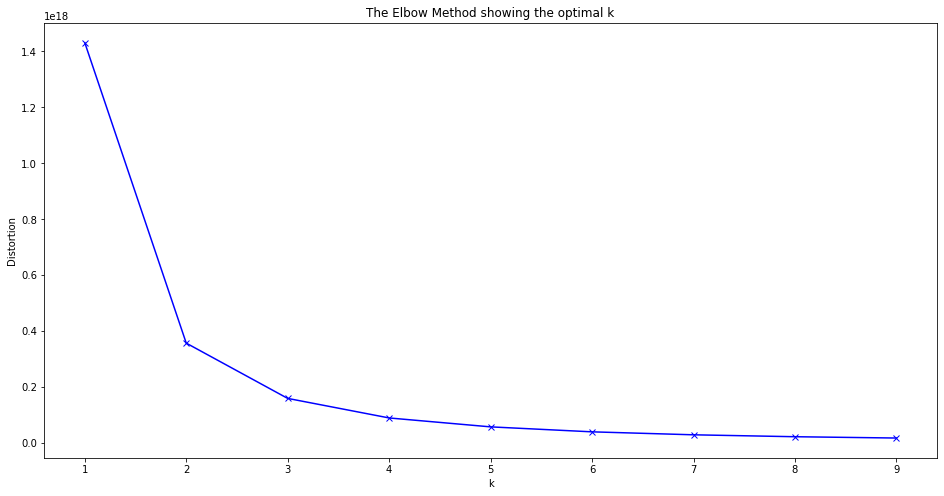

In [653]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [654]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(subs_seg_dmy)

KMeans(n_clusters=3)

In [655]:
scaler = MinMaxScaler()
subs_scaled = scaler.fit_transform(subs_seg_dmy)

In [656]:
kmeanModel.fit(subs_scaled)

KMeans(n_clusters=3)

In [657]:
label = kmeanModel.fit_predict(subs_scaled)

In [658]:
label

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [659]:
clus = pd.DataFrame(label)

In [660]:
clus[0]

0         0
1         0
2         0
3         2
4         2
         ..
172257    1
172258    0
172259    0
172260    1
172261    0
Name: 0, Length: 172262, dtype: int32

In [661]:
c = clus[0].to_list()

In [662]:
subs_seg['cluster'] = c

<ipython-input-662-7b26682c7aff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subs_seg['cluster'] = c


In [663]:
subs_seg

,subid,package_type,intended_use,age,male_TF,op_sys,preferred_genre,paid_TF,retarget_TF,discount_price,cluster
2,26844789,enhanced,replace OTT,25.0,True,iOS,regional,False,False,4.5141,0
3,29417030,base,replace OTT,30.0,False,Android,drama,False,False,4.5141,0
4,26723159,base,replace OTT,28.0,False,iOS,comedy,False,False,4.5141,0
6,29726122,base,access to exclusive content,61.0,False,Android,comedy,True,False,4.5141,2
7,29726122,base,access to exclusive content,61.0,False,Android,comedy,True,False,4.5141,2
...,...,...,...,...,...,...,...,...,...,...,...
301240,21434712,enhanced,supplement OTT,38.0,False,iOS,comedy,False,False,4.5141,1
301241,25843074,enhanced,replace OTT,49.0,False,iOS,comedy,True,True,4.5141,0
301242,25843074,enhanced,replace OTT,49.0,False,iOS,comedy,True,True,4.5141,0
301243,24799085,base,access to exclusive content,45.0,False,iOS,comedy,False,False,4.5141,1


In [664]:
subs_seg.to_csv("subscribers_subset_clustered.csv",index=False)

/Users/a84427/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/a84427/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/a84427/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

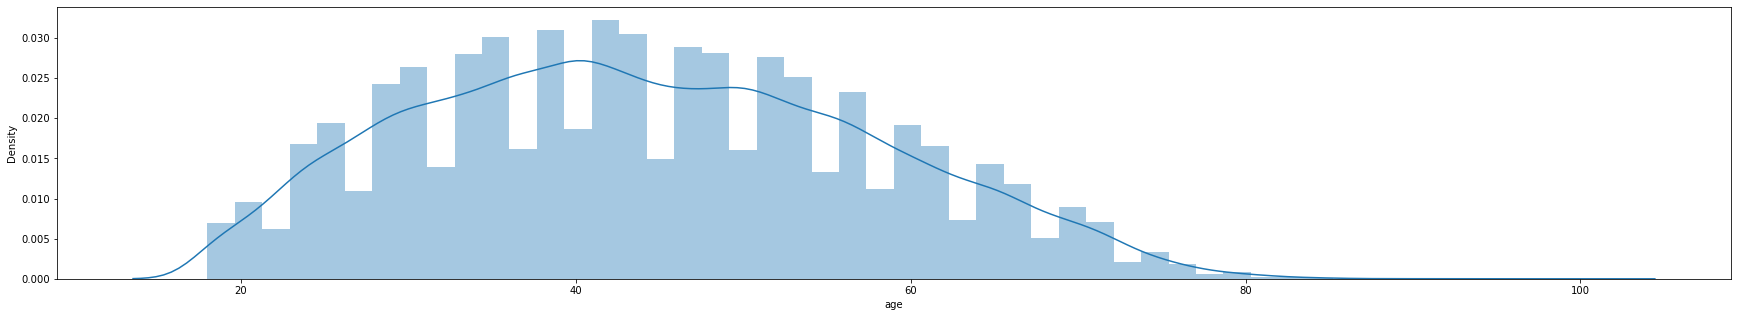

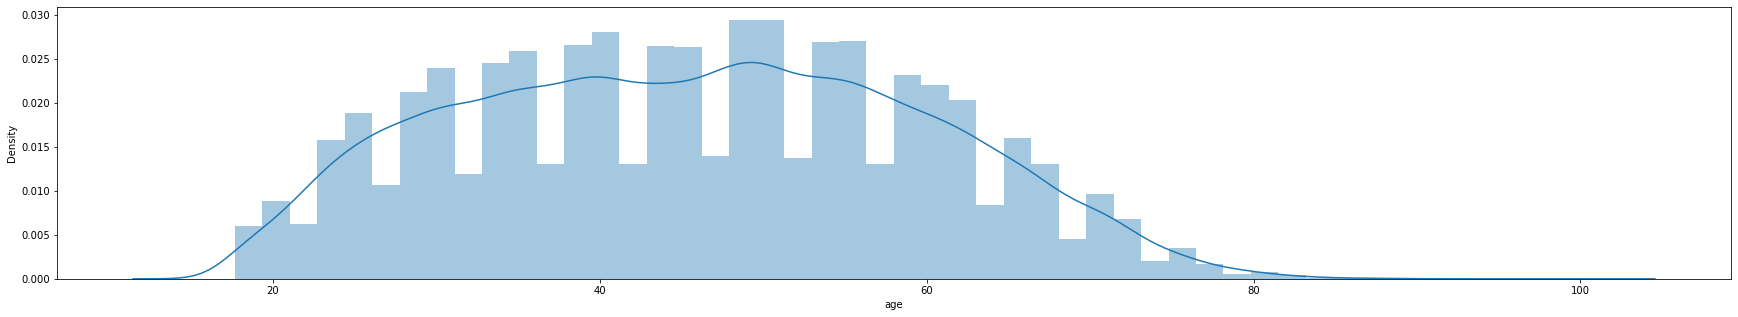

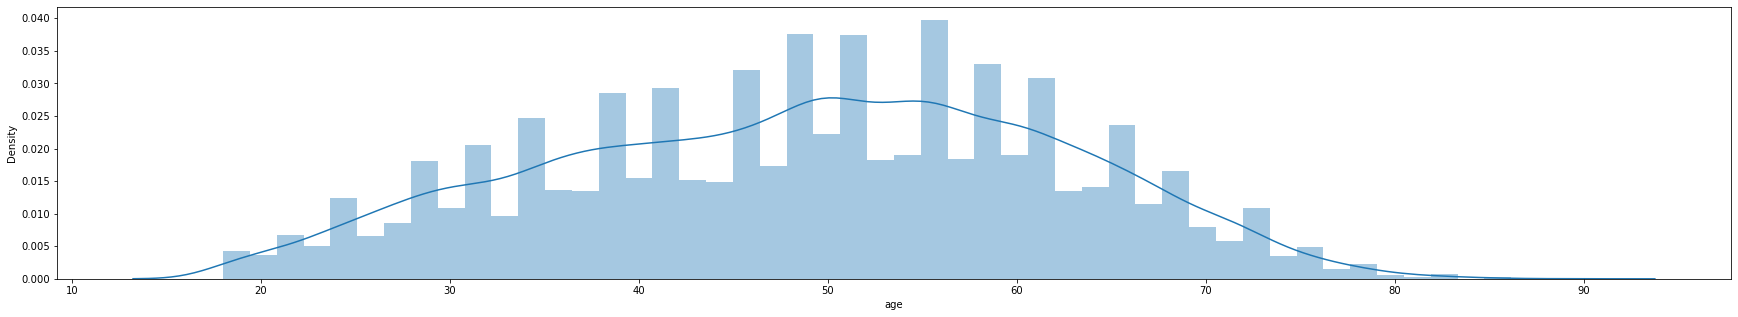

In [702]:
plt.figure(figsize=(30,5))
#plt.subplot(1,5,1)
sns.distplot(subs_seg[subs_seg['cluster']==0]['age'])
#plt.show()

plt.figure(figsize=(30,5))
#plt.subplot(1,5,2)
sns.distplot(subs_seg[subs_seg['cluster']==1]['age'])
#plt.show()

plt.figure(figsize=(30,5))
#plt.subplot(1,5,3)
sns.distplot(subs_seg[subs_seg['cluster']==2]['age'])
plt.show()

## Attribution and Allocation

In [665]:
conversion = pd.DataFrame()
#conversion['date'] = subs['account_creation_date'].astype(str)
#conversion['year'] = pd.DatetimeIndex(subs['account_creation_date']).year
#conversion['month'] = pd.DatetimeIndex(subs['account_creation_date']).month
#conversion['date'] = conversion['year'].astype(str) + '-' + conversion['month'].astype(str)
conversion['date'] = subs['account_creation_date'].dt.strftime('%Y-%m')
conversion['last_interaction'] = subs['attribution_technical']
conversion['price'] = subs['discount_price']

In [666]:
conversion

,date,last_interaction,price
162502,2020-01,facebook,4.5141
380374,2020-03,facebook,4.5141
496617,2019-12,organic,4.5141
356799,2020-01,search,4.5141
681701,2019-10,discovery,4.5141
...,...,...,...
509326,2019-11,facebook,4.5141
229587,2019-12,google_organic,4.5141
281340,2019-12,facebook,4.5141
87198,2020-01,facebook,4.5141


In [668]:
c1 = conversion[conversion['last_interaction'] == 'facebook']
c2 = conversion[conversion['last_interaction'] == 'email']
c3 = conversion[conversion['last_interaction'] == 'search']
c4 = conversion[conversion['last_interaction'] == 'brand sem intent google']
c5 = conversion[conversion['last_interaction'] == 'affiliate']
c6 = conversion[conversion['last_interaction'] == 'email_blast']
c7 = conversion[conversion['last_interaction'] == 'pinterest']
c8 = conversion[conversion['last_interaction'] == 'referral']

In [669]:
conversion_2 = pd.concat([c1, c2, c3, c4, c5, c6, c7, c8])
conversion_2

,date,last_interaction,price
162502,2020-01,facebook,4.5141
380374,2020-03,facebook,4.5141
254782,2020-02,facebook,4.5141
377093,2019-08,facebook,4.5141
143042,2020-03,facebook,4.5141
...,...,...,...
36230,2019-09,referral,4.5141
412635,2019-07,referral,4.5141
133320,2019-10,referral,4.5141
207628,2019-11,referral,4.5141


In [670]:
conversion_2.to_csv("conversion.csv")

### Calculate CAC and CLV

In [671]:
spending = pd.read_excel (r'advertising_spend_data.xlsx', sheet_name='Sheet1')
spending

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100
1,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600
2,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800
3,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400
4,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300
5,2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300
6,2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000
7,2020-01-31,49000,75500,33600,22700,14300,300,6700,7400
8,2020-02-29,49700,76600,30100,21700,15000,300,6400,6500
9,2020-03-31,49100,78000,22700,21200,17600,300,5900,10000


In [672]:
spend = pd.DataFrame()
#spend['year'] = pd.DatetimeIndex(spending['date']).year
#spend['month'] = pd.DatetimeIndex(spending['date']).month
#spend['date'] = spend['year'].astype(str) + '-' + spend['month'].astype(str)
spend['date'] = spending['date'].dt.strftime('%Y-%m')
spend['facebook'] = spending['facebook']
spend['email'] = spending['email']
spend['search'] = spending['search']
spend['brand sem intent google'] = spending['brand sem intent google']
spend['affiliate'] = spending['affiliate']
spend['email_blast'] = spending['email_blast']
spend['pinterest'] = spending['pinterest']
spend['referral'] = spending['referral']

In [673]:
#spend = spend.drop(labels = ['year', 'month'], axis = 1)
spend

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,2019-06,84800,75000,17300,21400,11900,10500,5900,6100
1,2019-07,60000,75600,17300,21300,12000,29800,6000,6600
2,2019-08,52300,76100,18100,21300,16300,65900,6200,6800
3,2019-09,49000,75800,18900,21300,16400,73700,6000,7400
4,2019-10,51300,76000,21000,21400,12200,32300,6700,7300
5,2019-11,56100,75900,21400,21600,11700,9800,6300,7300
6,2019-12,51400,76100,32100,22200,12100,3500,7200,8000
7,2020-01,49000,75500,33600,22700,14300,300,6700,7400
8,2020-02,49700,76600,30100,21700,15000,300,6400,6500
9,2020-03,49100,78000,22700,21200,17600,300,5900,10000


In [674]:
a = conversion_2.groupby(['date', 'last_interaction']).size().to_dict()
#a

In [675]:
channel_spend = pd.DataFrame()
channel_spend['date_channel'] = a.keys()
channel_spend['count'] = a.values()
channel_spend

,date_channel,count
0,"(2019-06, affiliate)",78
1,"(2019-06, brand sem intent google)",197
2,"(2019-06, email)",309
3,"(2019-06, email_blast)",108
4,"(2019-06, facebook)",1307
...,...,...
75,"(2020-03, email_blast)",56
76,"(2020-03, facebook)",6881
77,"(2020-03, pinterest)",455
78,"(2020-03, referral)",568


In [676]:
spend = spend.set_index('date')

In [677]:
spend

,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
date,,,,,,,,
2019-06,84800,75000,17300,21400,11900,10500,5900,6100
2019-07,60000,75600,17300,21300,12000,29800,6000,6600
2019-08,52300,76100,18100,21300,16300,65900,6200,6800
2019-09,49000,75800,18900,21300,16400,73700,6000,7400
2019-10,51300,76000,21000,21400,12200,32300,6700,7300
2019-11,56100,75900,21400,21600,11700,9800,6300,7300
2019-12,51400,76100,32100,22200,12100,3500,7200,8000
2020-01,49000,75500,33600,22700,14300,300,6700,7400
2020-02,49700,76600,30100,21700,15000,300,6400,6500


In [678]:
s = []
sp = spend.to_dict() 

for i in channel_spend['date_channel']:
    s.append(sp[i[1]][i[0]])

In [679]:
channel_spend['spending'] = s
channel_spend

,date_channel,count,spending
0,"(2019-06, affiliate)",78,11900
1,"(2019-06, brand sem intent google)",197,21400
2,"(2019-06, email)",309,75000
3,"(2019-06, email_blast)",108,10500
4,"(2019-06, facebook)",1307,84800
...,...,...,...
75,"(2020-03, email_blast)",56,300
76,"(2020-03, facebook)",6881,49100
77,"(2020-03, pinterest)",455,5900
78,"(2020-03, referral)",568,10000


In [680]:
channel_spend['CAC'] = channel_spend['spending']/channel_spend['count']

In [681]:
channel_spend

,date_channel,count,spending,CAC
0,"(2019-06, affiliate)",78,11900,152.564103
1,"(2019-06, brand sem intent google)",197,21400,108.629442
2,"(2019-06, email)",309,75000,242.718447
3,"(2019-06, email_blast)",108,10500,97.222222
4,"(2019-06, facebook)",1307,84800,64.881408
...,...,...,...,...
75,"(2020-03, email_blast)",56,300,5.357143
76,"(2020-03, facebook)",6881,49100,7.135591
77,"(2020-03, pinterest)",455,5900,12.967033
78,"(2020-03, referral)",568,10000,17.605634


In [682]:
revenue = conversion_2.groupby(['date',"last_interaction"]).agg('sum')

In [683]:
revenue

price
date    last_interaction                   
2019-06 affiliate                  352.0998
        brand sem intent google    889.2777
        email                     1394.8569
        email_blast                487.5228
        facebook                  5899.9287
...                                     ...
2020-03 email_blast                252.7896
        facebook                 31061.5221
        pinterest                 2053.9155
        referral                  2564.0088
        search                   13957.5972

[80 rows x 1 columns]

In [684]:
p = []
for i in channel_spend['date_channel']:
    p.append(revenue['price'][i[0],i[1]])
    
channel_spend['revenue'] = p
channel_spend

,date_channel,count,spending,CAC,revenue
0,"(2019-06, affiliate)",78,11900,152.564103,352.0998
1,"(2019-06, brand sem intent google)",197,21400,108.629442,889.2777
2,"(2019-06, email)",309,75000,242.718447,1394.8569
3,"(2019-06, email_blast)",108,10500,97.222222,487.5228
4,"(2019-06, facebook)",1307,84800,64.881408,5899.9287
...,...,...,...,...,...
75,"(2020-03, email_blast)",56,300,5.357143,252.7896
76,"(2020-03, facebook)",6881,49100,7.135591,31061.5221
77,"(2020-03, pinterest)",455,5900,12.967033,2053.9155
78,"(2020-03, referral)",568,10000,17.605634,2564.0088


In [685]:
channel_spend['CLV'] = channel_spend['revenue']/channel_spend['count'] - channel_spend['CAC']

In [686]:
channel_spend

,date_channel,count,spending,CAC,revenue,CLV
0,"(2019-06, affiliate)",78,11900,152.564103,352.0998,-148.050003
1,"(2019-06, brand sem intent google)",197,21400,108.629442,889.2777,-104.115342
2,"(2019-06, email)",309,75000,242.718447,1394.8569,-238.204347
3,"(2019-06, email_blast)",108,10500,97.222222,487.5228,-92.708122
4,"(2019-06, facebook)",1307,84800,64.881408,5899.9287,-60.367308
...,...,...,...,...,...,...
75,"(2020-03, email_blast)",56,300,5.357143,252.7896,-0.843043
76,"(2020-03, facebook)",6881,49100,7.135591,31061.5221,-2.621491
77,"(2020-03, pinterest)",455,5900,12.967033,2053.9155,-8.452933
78,"(2020-03, referral)",568,10000,17.605634,2564.0088,-13.091534


In [687]:
channel_spend.to_csv('CAC & CLV.csv')

## Churn

In [792]:
churn_merge = subs_csr_merge

In [793]:
churn_merge['churn_TF'] = churn_merge['current_sub_TF'].map({True:0 ,False:1})

In [797]:
#churn_merge.info()

In [798]:
churn = churn_merge.dropna(subset=['churn_TF'])

In [799]:
churn

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,account_creation_date_y,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew,churn_TF
2,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,2019-12-07 16:37:06,14.0,False,OTT,0.0000,0.0,2019-12-07 17:34:29,NaT,False,1.0
6,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,2020-02-19 18:30:15,14.0,True,OTT,4.5875,0.0,2020-02-19 19:45:46,2020-03-05 13:52:53,True,0.0
7,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,2020-02-19 18:30:15,14.0,True,OTT,4.5875,1.0,2020-03-05 13:52:53,NaT,False,0.0
8,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,...,2020-03-05 14:52:22,14.0,True,OTT,3.4498,0.0,2020-03-05 14:52:22,2020-03-20 13:54:48,True,0.0
9,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,...,2020-03-05 14:52:22,14.0,True,OTT,3.4498,1.0,2020-03-20 13:54:48,NaT,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301238,25549852,enhanced,NaN,comedy,access to exclusive content,28.751405,NaN,False,61.0,False,...,2020-03-06 02:57:03,14.0,False,OTT,0.0000,0.0,2020-03-06 06:37:50,NaT,False,1.0
301239,25835684,base,2.169904,drama,access to exclusive content,24.401536,1.881068,False,43.0,False,...,2020-01-01 22:43:56,14.0,False,OTT,0.0000,0.0,2020-01-01 22:43:56,NaT,False,1.0
301240,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,...,2019-11-17 14:12:33,14.0,False,OTT,0.0000,0.0,2019-11-17 15:05:20,NaT,False,1.0
301241,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,...,2019-12-06 18:02:13,14.0,True,OTT,4.5875,0.0,2019-12-06 19:05:16,2019-12-21 10:05:18,True,1.0


In [800]:
#churn.info()

In [802]:
#engagement.info()

In [803]:
engagement_features = engagement.groupby('subid').sum()[['app_opens','cust_service_mssgs','num_videos_completed',
                                                         'num_videos_more_than_30_seconds','num_videos_rated',
                                                         'num_series_started']]
engagement_pmt = engagement.groupby('subid').max()['payment_period']


In [804]:
payment_period = engagement_pmt.to_frame().reset_index()

In [805]:
engagement_full = engagement_features.merge(payment_period, on = 'subid', how = 'outer')

In [806]:
churn = churn.merge(engagement_full,on='subid',how='outer')

In [807]:
churn

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,next_payment,renew,churn_TF,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y
0,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,NaT,False,1.0,2.0,2.0,13.0,13.0,0.0,1.0,0.0
1,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,2020-03-05 13:52:53,True,0.0,40.0,17.0,182.0,182.0,6.0,39.0,1.0
2,29726122,base,2.049135,comedy,access to exclusive content,20.051667,1.860289,False,61.0,False,...,NaT,False,0.0,40.0,17.0,182.0,182.0,6.0,39.0,1.0
3,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,...,2020-03-20 13:54:48,True,0.0,104.0,10.0,84.0,206.0,0.0,29.0,1.0
4,20299962,base,3.002048,drama,access to exclusive content,34.551230,1.870503,False,23.0,False,...,NaT,False,0.0,104.0,10.0,84.0,206.0,0.0,29.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209662,29924076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,324.0,19.0,139.0,326.0,24.0,59.0,2.0
209663,29934957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,8.0,2.0,4.0,21.0,0.0,1.0,0.0
209664,29937096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,2.0,2.0,2.0,13.0,0.0,0.0,0.0
209665,29958291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaT,NaN,NaN,3.0,2.0,15.0,18.0,0.0,3.0,0.0


In [858]:
#Select feature to build churn model
churn_model = churn[['preferred_genre', 'weekly_consumption_hour','age', 'retarget_TF', 'male_TF', 
                   'paid_TF','app_opens','cust_service_mssgs','num_videos_completed', 
                   'num_videos_more_than_30_seconds','num_videos_rated', 'num_series_started','payment_period_y',
                    'churn_TF']]
churn_model

,preferred_genre,weekly_consumption_hour,age,retarget_TF,male_TF,paid_TF,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y,churn_TF
0,regional,36.001186,25.0,False,True,False,2.0,2.0,13.0,13.0,0.0,1.0,0.0,1.0
1,comedy,20.051667,61.0,False,False,True,40.0,17.0,182.0,182.0,6.0,39.0,1.0,0.0
2,comedy,20.051667,61.0,False,False,True,40.0,17.0,182.0,182.0,6.0,39.0,1.0,0.0
3,drama,34.551230,23.0,False,False,True,104.0,10.0,84.0,206.0,0.0,29.0,1.0,0.0
4,drama,34.551230,23.0,False,False,True,104.0,10.0,84.0,206.0,0.0,29.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209662,NaN,NaN,NaN,NaN,NaN,NaN,324.0,19.0,139.0,326.0,24.0,59.0,2.0,NaN
209663,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.0,4.0,21.0,0.0,1.0,0.0,NaN
209664,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,13.0,0.0,0.0,0.0,NaN
209665,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,15.0,18.0,0.0,3.0,0.0,NaN


In [859]:
churn_model = churn_model.dropna()
churn_model

,preferred_genre,weekly_consumption_hour,age,retarget_TF,male_TF,paid_TF,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period_y,churn_TF
0,regional,36.001186,25.0,False,True,False,2.0,2.0,13.0,13.0,0.0,1.0,0.0,1.0
1,comedy,20.051667,61.0,False,False,True,40.0,17.0,182.0,182.0,6.0,39.0,1.0,0.0
2,comedy,20.051667,61.0,False,False,True,40.0,17.0,182.0,182.0,6.0,39.0,1.0,0.0
3,drama,34.551230,23.0,False,False,True,104.0,10.0,84.0,206.0,0.0,29.0,1.0,0.0
4,drama,34.551230,23.0,False,False,True,104.0,10.0,84.0,206.0,0.0,29.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209167,comedy,28.751405,61.0,False,False,False,1.0,2.0,0.0,6.0,0.0,0.0,0.0,1.0
209168,drama,24.401536,43.0,False,False,False,31.0,5.0,47.0,59.0,0.0,8.0,0.0,1.0
209169,comedy,28.751405,38.0,False,False,False,16.0,3.0,20.0,36.0,0.0,2.0,0.0,1.0
209170,comedy,27.301448,49.0,True,False,True,72.0,15.0,39.0,122.0,0.0,15.0,1.0,1.0


In [860]:
churn_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113907 entries, 0 to 209171
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   preferred_genre                  113907 non-null  object 
 1   weekly_consumption_hour          113907 non-null  float64
 2   age                              113907 non-null  float64
 3   retarget_TF                      113907 non-null  object 
 4   male_TF                          113907 non-null  object 
 5   paid_TF                          113907 non-null  object 
 6   app_opens                        113907 non-null  float64
 7   cust_service_mssgs               113907 non-null  float64
 8   num_videos_completed             113907 non-null  float64
 9   num_videos_more_than_30_seconds  113907 non-null  float64
 10  num_videos_rated                 113907 non-null  float64
 11  num_series_started               113907 non-null  float64
 12  pa

In [872]:
churn_model['male_TF'] = churn_model['male_TF'].map({True: 1, False: 0})
churn_model['retarget_TF'] = churn_model['retarget_TF'].map({True: 1, False: 0})
churn_model['paid_TF'] = churn_model['paid_TF'].map({True: 1, False: 0})

<ipython-input-872-0c6d5bbf4f40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_model['male_TF'] = churn_model['male_TF'].map({True: 1, False: 0})
<ipython-input-872-0c6d5bbf4f40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_model['retarget_TF'] = churn_model['retarget_TF'].map({True: 1, False: 0})
<ipython-input-872-0c6d5bbf4f40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [873]:
churn_dummy = pd.get_dummies(churn_model)

In [849]:
pd.options.display.max_columns = 25

In [862]:
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact

In [863]:
def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [874]:
# ----- READ IN DATA -----
#df = pd.read_csv('subscriber_data.csv')
df_train, df_test = model_selection.train_test_split(churn_dummy, test_size=0.3, random_state=100)

In [875]:
churn_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113907 entries, 0 to 209171
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   weekly_consumption_hour          113907 non-null  float64
 1   age                              113907 non-null  float64
 2   retarget_TF                      113907 non-null  int64  
 3   male_TF                          113907 non-null  int64  
 4   paid_TF                          113907 non-null  int64  
 5   app_opens                        113907 non-null  float64
 6   cust_service_mssgs               113907 non-null  float64
 7   num_videos_completed             113907 non-null  float64
 8   num_videos_more_than_30_seconds  113907 non-null  float64
 9   num_videos_rated                 113907 non-null  float64
 10  num_series_started               113907 non-null  float64
 11  payment_period_y                 113907 non-null  float64
 12  ch

In [876]:
# ----- FIT CHURN MODEL ------
y_col_name = 'churn_TF' # specify which column contains outcome variable y. Needs to be coded as binary True/False or 0/1
x_col_name = ['preferred_genre_comedy', 'preferred_genre_drama', 'preferred_genre_international','preferred_genre_other',
              'preferred_genre_regional', 'retarget_TF',
              'weekly_consumption_hour','age', 'male_TF', 'paid_TF','app_opens','cust_service_mssgs',
              'num_videos_completed', 
              'num_videos_more_than_30_seconds','num_videos_rated', 'num_series_started','payment_period_y']    # list of x covariates
add_constant_TF = True

In [877]:
# --- preprocess data for model routine format requirements
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

In [878]:
# --- fit linear probability model
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF REGRESSION MODEL FITTING\n")
print(lpm_results.summary())


RESULTS OF REGRESSION MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     6220.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:07:31   Log-Likelihood:                -18496.
No. Observations:               79734   AIC:                         3.703e+04
Df Residuals:                   79717   BIC:                         3.718e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [879]:
# --- fit logistic regression
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.268764
         Iterations 12

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:                79734
Model:                          Logit   Df Residuals:                    79717
Method:                           MLE   Df Model:                           16
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.5591
Time:                        20:07:32   Log-Likelihood:                -21430.
converged:                       True   LL-Null:                       -48599.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
preferred_genre_comedy          

In [880]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])

IndexError: list index out of range

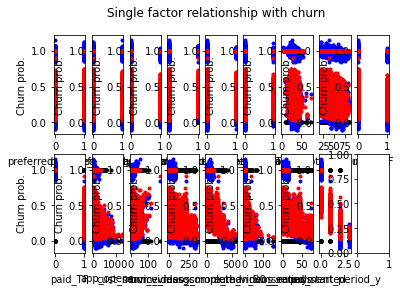

In [881]:
# plot predictions vs. data
select_plot_coef = [x for x in x_col_name if x != 'const']
n_rows = 2
n_cols = math.ceil(len(select_plot_coef) / n_rows)
fig, axes = plt.subplots(n_rows, n_cols)
fig.suptitle('Single factor relationship with churn')
for i in range(n_rows):
    for j in range(n_cols):
        select_coef = select_plot_coef[i * n_cols + j]
        axes[i, j].plot(df_test[select_coef], df_test['churn_TF'], 'k.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_lpm'], 'b.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_logit'], 'r.')
        axes[i, j].set(xlabel=select_coef, ylabel='Churn prob.')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

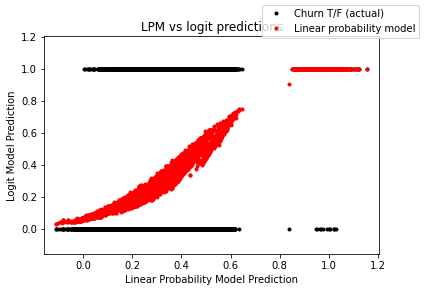

In [882]:
# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']], df_test[['churn_TF']], 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

In [883]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_lpm'])

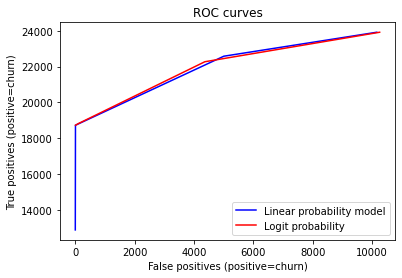

In [884]:
# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [ ]:
## q1

In [885]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = 10
discount_amount = 0.3
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [886]:
# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
np.random.seed(0)
df_test['random_draws'] = np.random.random(df_test.shape[0])

In [887]:
# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

In [888]:
df_impact

,subs,revenue,lift_from_no_offer
no_offer,10256,102560,0.0
lpm_offer,16022,140885,0.373684
logit_offer,16205,141179,0.37655


In [889]:
# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

In [890]:
df_lift_threshold[(df_lift_threshold['logit_offer'] == max(df_lift_threshold['logit_offer']))]

,threshold,no_offer,lpm_offer,logit_offer
72,0.72,0.0,0.384185,0.384341


In [892]:
df_test_2, df_impact_2 = apply_offers(df_test, 0.72, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

In [893]:
df_impact_2

,subs,revenue,lift_from_no_offer
no_offer,10256,102560,0.0
lpm_offer,15890,141962,0.384185
logit_offer,15894,141978,0.384341


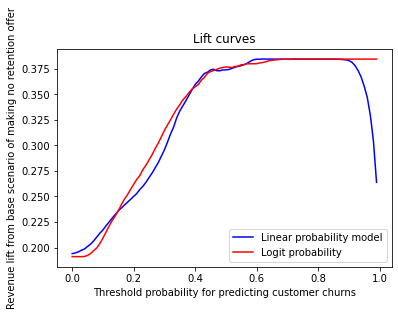

In [894]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [ ]:
## 3

In [895]:
# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

In [896]:
# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(df_test, 0.72, base_price, t_discount_amount, cases, t_discount_amount, acceptance_rate_nonchurn )

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

In [897]:
df_lift_discount_amount[(df_lift_discount_amount['logit_offer'] == max(df_lift_discount_amount['logit_offer']))]

,discount_amount,no_offer,lpm_offer,logit_offer
51,0.51,0.0,0.456533,0.456621


In [898]:
df_test_3, df_impact_3 = apply_offers(df_test, 0.72, base_price, 0.51, cases, 0.51, acceptance_rate_nonchurn)

In [899]:
df_impact_3

,subs,revenue,lift_from_no_offer
no_offer,10256,102560,0.0
lpm_offer,19824,149382.0,0.456533
logit_offer,19830,149391.0,0.456621


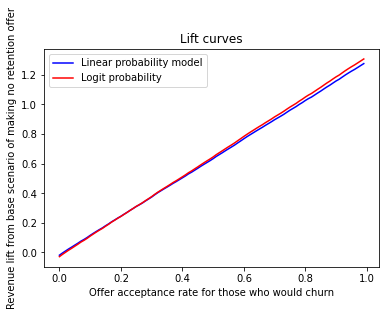

In [900]:
# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

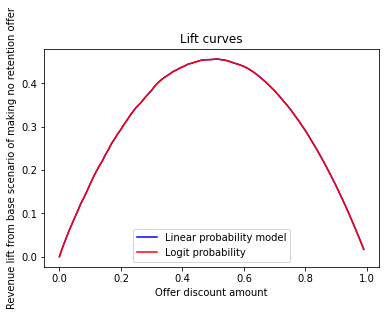

In [901]:
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [ ]:
## 4

In [902]:
# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    t_discount_amount = t_ind / 100
    _, t_df_impact = apply_offers(df_test, 0.72, base_price, t_discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

In [903]:
df_lift_acceptance_rate_churn[(df_lift_acceptance_rate_churn['logit_offer'] == max(df_lift_acceptance_rate_churn['logit_offer']))]

,acceptance_rate_churn,no_offer,lpm_offer,logit_offer
51,0.51,0.0,0.456533,0.456621


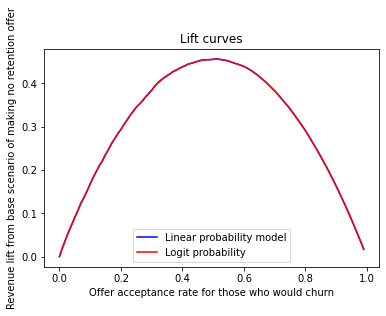

In [904]:
# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])